In [2]:
import pandas as pd
df = pd.read_csv('5g-South Asia.csv')
df.head()

,Seasonal Variation (Data Source),Simulation Run Number,T-R Separation Distance (m),Time Delay (ns),Received Power (dBm),Phase (rad),Azimuth AoD (degree),Elevation AoD (degree),Azimuth AoA (degree),Elevation AoA (degree),Path Loss (dB),RMS Delay Spread (ns),Season,Frequency
0,FallL,1,216.4,721,-120.8,3.2,291,-2.1,14.3,-17,150.8,3.5,0,24.25
1,FallL,1,216.4,725,-127.8,5.6,299,1.4,176.9,18,157.7,1.5,0,24.25
2,FallL,1,216.4,729,-119.8,1.4,119,-4.4,212.3,5,149.8,0.4,0,24.25
3,FallL,1,216.4,735,-118.1,2.8,290,-1.2,315.4,-8,148.1,0.8,0,24.25
4,FallL,1,216.4,741,-126.1,3.1,295,-1.4,207.3,12,156.0,5.0,0,24.25


In [3]:
#check for missing values
df.isnull().sum()

Seasonal Variation (Data Source)    0
Simulation Run Number               0
T-R Separation Distance (m)         0
Time Delay (ns)                     0
Received Power (dBm)                0
 Phase (rad)                        0
Azimuth AoD (degree)                0
Elevation AoD (degree)              0
Azimuth AoA (degree)                0
Elevation AoA (degree)              0
Path Loss (dB)                      0
RMS Delay Spread (ns)               0
Season                              0
Frequency                           0
dtype: int64

Seasonal Variation Dashboard:
Heatmap, line charts and scatter plots to capture trends and visualize relationships between channel characteristics and atmospheric conditions across seasons

Weather Impact Analysis
Bar charts and Polar Charts to compare channel characteristics across different weather conditions within each season.

Interactive Features
Filters and Tooltips to enhance user engagement

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('5g-South Asia.csv')

# Normalize season names
df["Normalized Season"] = df["Seasonal Variation (Data Source)"].str.lower().str.extract(r'(fall|spring|summer|winter)')

# # One-Hot Encoding for Season
df = pd.get_dummies(df, columns=["Normalized Season"])

# Define features and target
features = ["T-R Separation Distance (m)", "Received Power (dBm)", "Azimuth AoD (degree)",
            "Elevation AoD (degree)", "Azimuth AoA (degree)", "Elevation AoA (degree)",
            "RMS Delay Spread (ns)", "Frequency",
            "Normalized Season_fall", "Normalized Season_spring",
            "Normalized Season_summer", "Normalized Season_winter"]

X = df[features]
y = df["Path Loss (dB)"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Evaluation Results:

Linear Regression:
   MAE = 5.91
   R² Score = 0.751

Ridge Regression:
   MAE = 5.91
   R² Score = 0.751

Random Forest:
   MAE = 3.31
   R² Score = 0.899

XGBoost:
   MAE = 3.26
   R² Score = 0.908

Support Vector Regressor:
   MAE = 7.85
   R² Score = 0.562

K-Nearest Neighbors:
   MAE = 5.60
   R² Score = 0.770

Neural Network (MLP):
   MAE = 4.24
   R² Score = 0.859



c:\Users\Tan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tan\AppData\Local\Temp\ipykernel_10168\199159003.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=results_df, palette="Blues_d")


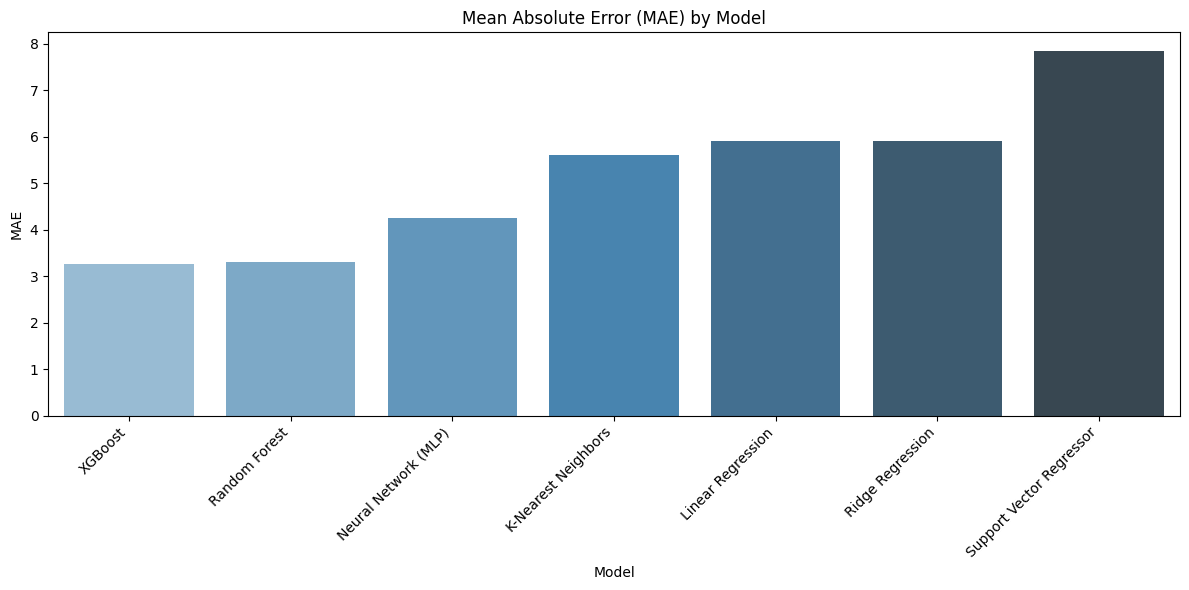

C:\Users\Tan\AppData\Local\Temp\ipykernel_10168\199159003.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2 Score", data=results_df, palette="Greens_d")


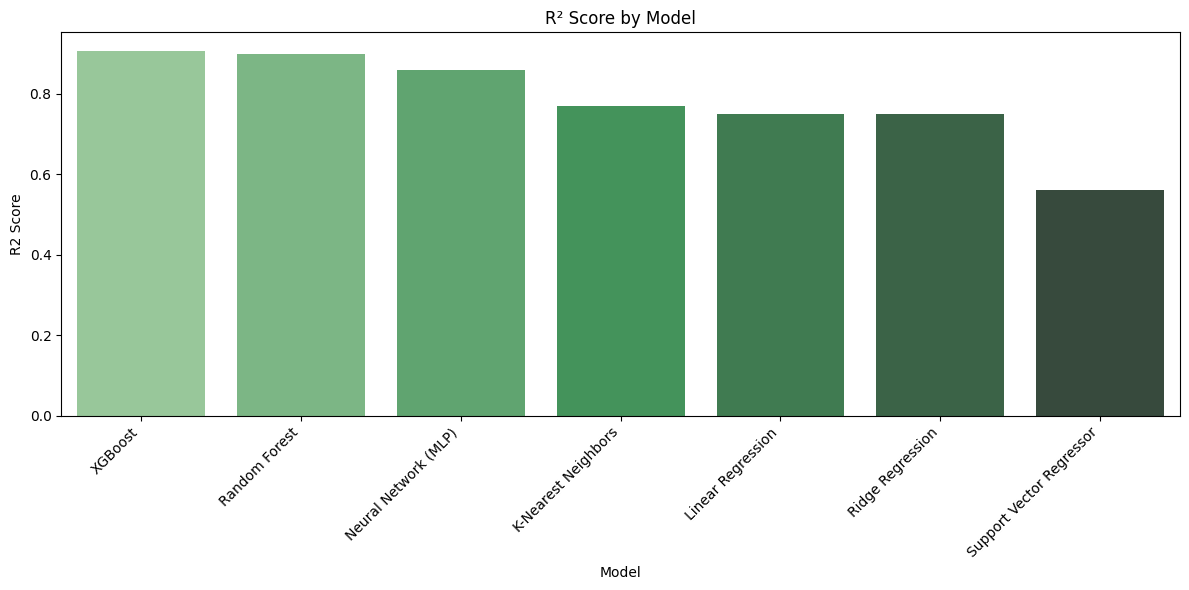

In [5]:
# Feature Scaling (for models that need it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models Dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror'),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
}

results = []


# Train and Evaluate Models
print("Model Evaluation Results:\n")
for name, model in models.items():
    if "SVR" in name or "KNN" in name or "MLP" in name:  # Use scaled data
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:  # Tree-based models don’t need scaling
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"   MAE = {mae:.2f}")
    print(f"   R² Score = {r2:.3f}\n")
    results.append({
        "Model": name,
        "MAE": mae,
        "R2 Score": r2
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)

# Plot MAE
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="MAE", data=results_df, palette="Blues_d")
plt.xticks(rotation=45, ha='right')
plt.title("Mean Absolute Error (MAE) by Model")
plt.tight_layout()
plt.show()

# Plot R² Score
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="R2 Score", data=results_df, palette="Greens_d")
plt.xticks(rotation=45, ha='right')
plt.title("R² Score by Model")
plt.tight_layout()
plt.show()
